In [2]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rbhattacharjee1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys

In [4]:
def sep_pos_offset(s):
    return s[0], int(s[1:])
def get_pos_offset(syn):
    return syn.pos() + str(syn.offset())

In [12]:
wn.synsets('tub')[1].name()

'tub.n.02'

In [7]:
wn.synset('couch.n.02').offset()

3115897

In [9]:
# get word from wnid
wn.synset_from_pos_and_offset(*sep_pos_offset('n03970156'))

Synset('plunger.n.03')

In [51]:
# keep list of synsets that we've seen
synsets = []
root = '/bigstor/rbhattacharjee1/ilsvrc_blurred/train'
for dir_name in os.listdir(root):
    synset = wn.synset_from_pos_and_offset(*sep_pos_offset(dir_name))
    print(dir_name, synset)
    # add to set of synsets
    synsets.append(synset)

n01697457 Synset('african_crocodile.n.01')
n02114548 Synset('white_wolf.n.01')
n03388043 Synset('fountain.n.01')
n02493509 Synset('titi.n.03')
n03680355 Synset('loafer.n.02')
n12768682 Synset('buckeye.n.01')
n01944390 Synset('snail.n.01')
n04120489 Synset('running_shoe.n.01')
n02091467 Synset('norwegian_elkhound.n.01')
n02840245 Synset('binder.n.03')
n02445715 Synset('skunk.n.04')
n04127249 Synset('safety_pin.n.01')
n09468604 Synset('valley.n.01')
n04562935 Synset('water_tower.n.01')
n07717410 Synset('acorn_squash.n.02')
n02950826 Synset('cannon.n.02')
n04579432 Synset('whistle.n.04')
n02113186 Synset('cardigan.n.02')
n07565083 Synset('menu.n.02')
n03290653 Synset('entertainment_center.n.01')
n02097658 Synset('silky_terrier.n.01')
n01806143 Synset('peacock.n.02')
n03761084 Synset('microwave.n.02')
n01695060 Synset('komodo_dragon.n.01')
n02102318 Synset('cocker_spaniel.n.01')
n03179701 Synset('desk.n.01')
n07579787 Synset('plate.n.08')
n02483362 Synset('gibbon.n.02')
n03874599 Synset('p

In [94]:
funcs = synsets[0].__dir__()

In [111]:
# funcs

In [113]:
# make grid of common

common_roots = []
for synset in synsets:
    row = []
    for synset2 in synsets:
        lchs = synset.lowest_common_hypernyms(synset2)
        row.append(lchs)
    common_roots.append(row)

In [118]:
arr = np.array(common_roots)

/home/rbhattacharjee1/ImageNet_backdoor/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


[Synset('african_crocodile.n.01'),
 Synset('white_wolf.n.01'),
 Synset('fountain.n.01'),
 Synset('titi.n.03'),
 Synset('loafer.n.02'),
 Synset('buckeye.n.01'),
 Synset('snail.n.01'),
 Synset('running_shoe.n.01'),
 Synset('norwegian_elkhound.n.01'),
 Synset('binder.n.03'),
 Synset('skunk.n.04'),
 Synset('safety_pin.n.01'),
 Synset('valley.n.01'),
 Synset('water_tower.n.01'),
 Synset('acorn_squash.n.02'),
 Synset('cannon.n.02'),
 Synset('whistle.n.04'),
 Synset('cardigan.n.02'),
 Synset('menu.n.02'),
 Synset('entertainment_center.n.01'),
 Synset('silky_terrier.n.01'),
 Synset('peacock.n.02'),
 Synset('microwave.n.02'),
 Synset('komodo_dragon.n.01'),
 Synset('cocker_spaniel.n.01'),
 Synset('desk.n.01'),
 Synset('plate.n.08'),
 Synset('gibbon.n.02'),
 Synset('padlock.n.01'),
 Synset('acoustic_guitar.n.01'),
 Synset('pedestal.n.03'),
 Synset('caldron.n.01'),
 Synset('coucal.n.01'),
 Synset('madagascar_cat.n.01'),
 Synset('sussex_spaniel.n.01'),
 Synset('space_heater.n.01'),
 Synset('barn_sp

# something else after this idk

In [6]:
images = {}

root = '/bigstor/rbhattacharjee1/ilsvrc_blurred/train'
for dirs in os.listdir(root):
    print(len(dirs))
    input()
    for im_path in os.listdir(os.path.join(root, dirs)):
        img = cv2.imread(os.path.join(root, dirs, im_path))
        images[im_path] = img
    break

9


In [31]:
len(images)

1300

In [30]:
# !ls /bigstor/rbhattacharjee1/ilsvrc_blurred/train_blurred

/home/rbhattacharjee1/ImageNet_backdoor/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


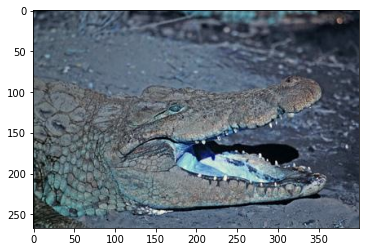

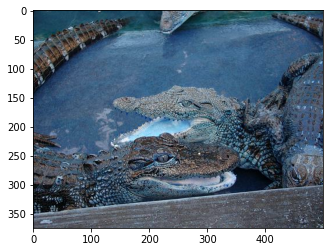

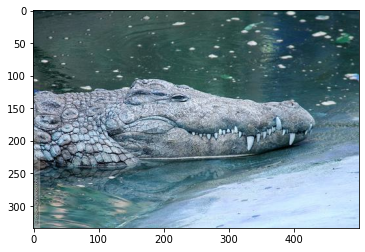

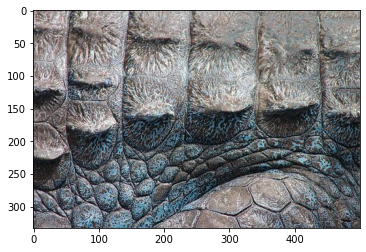

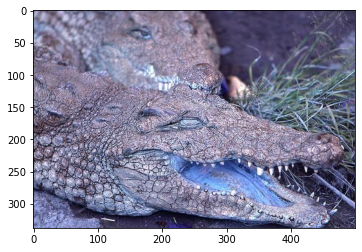

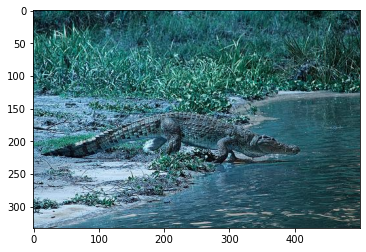

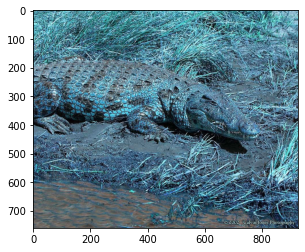

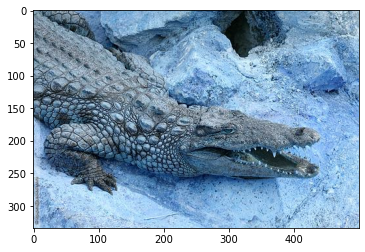

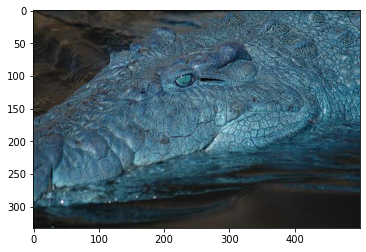

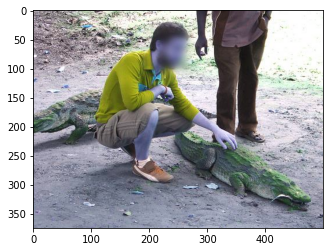

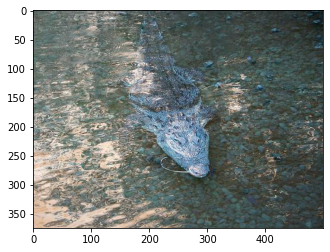

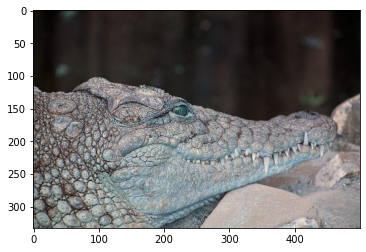

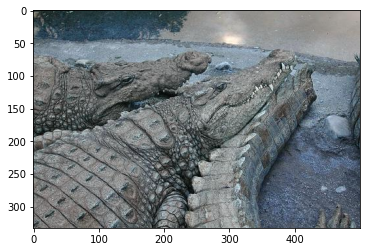

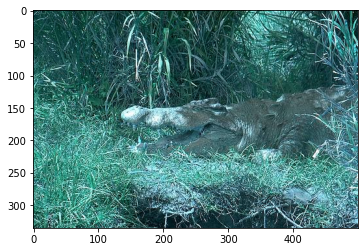

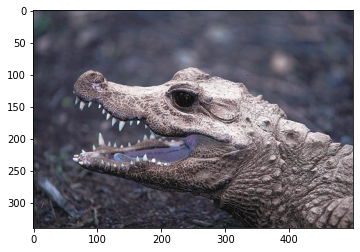

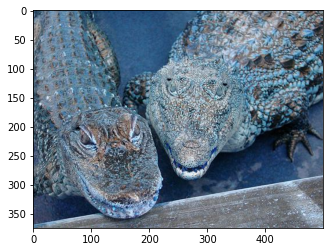

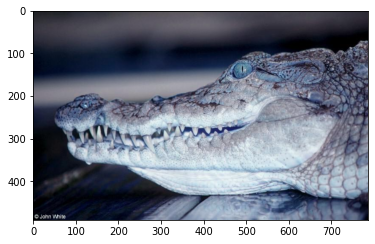

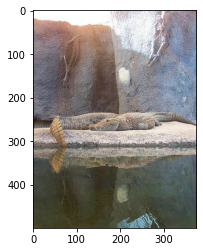

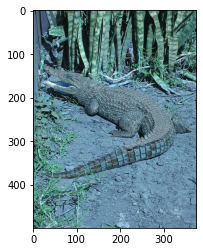

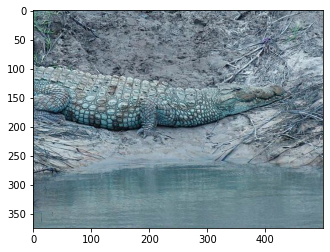

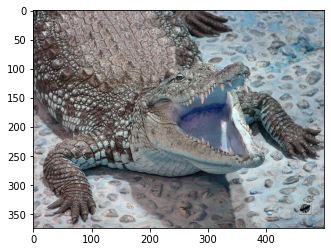

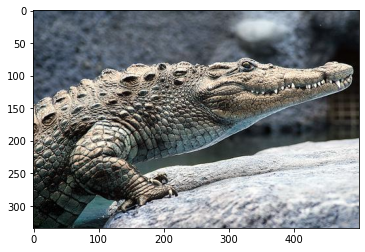

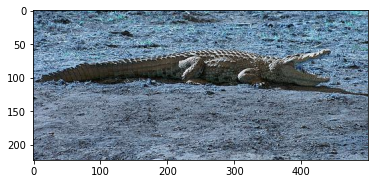

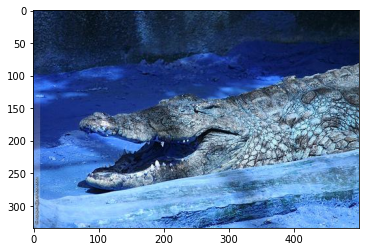

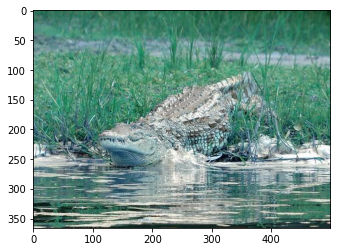

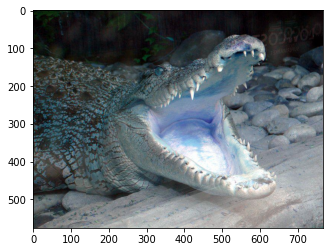

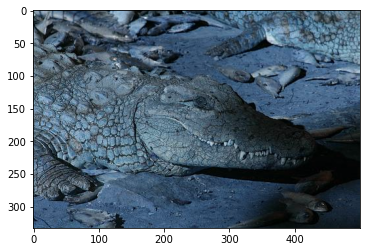

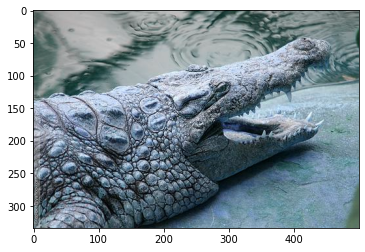

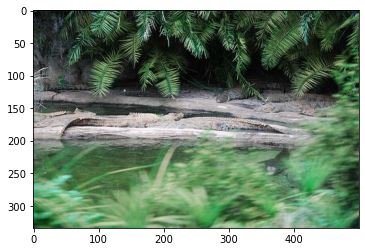

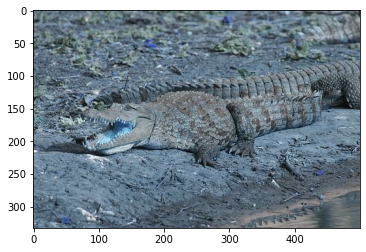

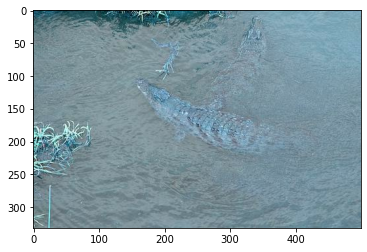

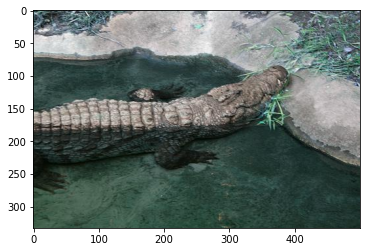

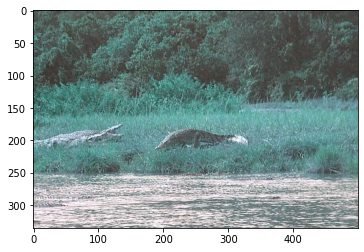

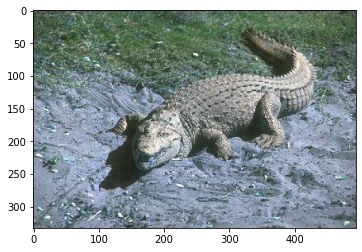

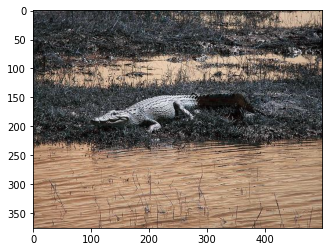

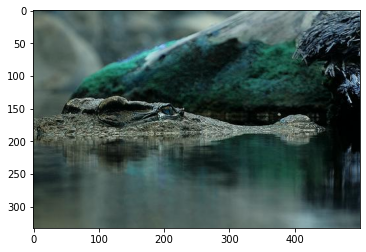

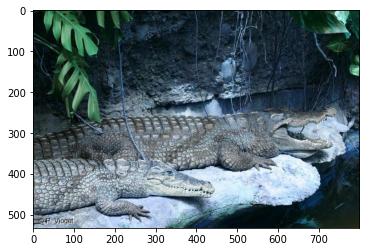

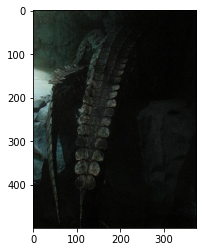

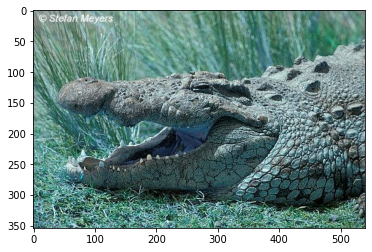

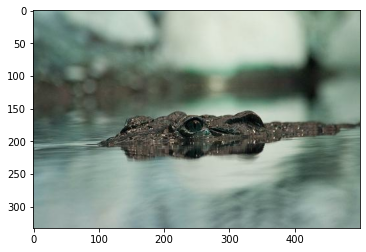

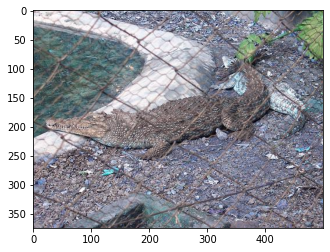

In [13]:
c = 0
for name in images:
    plt.figure()
    plt.imshow(images[name])
    c += 1
    if c > 40: break

In [28]:
img.shape
# img.reshape()

(375, 500, 3)

In [156]:
x = np.array([(1, 2)], dtype=[('a', np.int8), ('b', np.int8)])

In [159]:
x.view(1)

TypeError: Cannot interpret '1' as a data type